In [1]:
import pandas as pd
import numpy as np
from astropy.cosmology import Planck13
from astropy.io import fits
from astropy.table import Table
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt

import disperse

In [2]:
np.random.seed(0)

In [3]:
cosmo = Planck13
H0 = cosmo.H0.value
Om = cosmo.Om0
Ol = 0.69288
Ok = 0.0
print(f'H0 = {cosmo.H0.value}')
print(f'Om = {cosmo.Om0}')
print(f'Ol = {0.69288}')

H0 = 67.77
Om = 0.30712
Ol = 0.69288


In [4]:
RA_int = (160, 240)
DEC_int = (0, 20)
Z_int = (0, 1.00)

In [5]:
galaxies = pd.read_csv('SDSS/SDSS_DR16.csv')
galaxies = galaxies[galaxies['class'] == 'GALAXY']
galaxies = galaxies[(RA_int[0] <= galaxies['ra']) & (galaxies['ra'] <= RA_int[1])]
galaxies = galaxies[(DEC_int[0] <= galaxies['dec']) & (galaxies['dec'] <= DEC_int[1])]
galaxies = galaxies[(Z_int[0] < galaxies['z']) & (galaxies['z'] <= Z_int[1])]
galaxies = galaxies[['ra', 'dec', 'z']]
galaxies.columns = ['RA', 'DEC', 'Z']
galaxies.drop_duplicates(subset=['RA', 'DEC', 'Z'])
galaxies.reset_index(drop=True, inplace=True)
galaxies

,RA,DEC,Z
0,160.79459,0.033496,0.083110
1,160.81317,0.023209,0.125813
2,160.84827,0.055476,0.127083
3,160.58358,0.039047,0.124137
4,160.63588,0.020746,0.113844
...,...,...,...
395215,181.07759,18.828807,0.868627
395216,181.04309,18.916253,0.943938
395217,180.45119,19.940874,0.107345
395218,182.61117,19.935709,0.887771


In [6]:
CL_NUM = 100

In [7]:
dat = Table.read('DR5_cluster-catalog_v1.1.fits', format='fits')
clusters = dat[['RADeg', 'decDeg', 'redshift', 'redshiftType', 'M500c']].to_pandas()
clusters = clusters[clusters['redshiftType'] == b'spec']
clusters = clusters[['RADeg', 'decDeg', 'redshift', 'M500c']]
clusters.columns = ['RA', 'DEC', 'Z', 'M']
clusters = clusters[(RA_int[0] <= clusters['RA']) & (clusters['RA'] <= RA_int[1])]
clusters = clusters[(DEC_int[0] <= clusters['DEC']) & (clusters['DEC'] <= DEC_int[1])]
clusters = clusters[(Z_int[0] < clusters['Z']) & (clusters['Z'] <= Z_int[1])]
clusters = clusters[['RA', 'DEC', 'Z', 'M']]
clusters.columns = ['RA', 'DEC', 'Z', 'M']
clusters.drop_duplicates(subset=['RA', 'DEC', 'Z', 'M'])
full_clusters = clusters.copy()
clusters = clusters.iloc[np.random.choice(list(range(clusters.shape[0])), CL_NUM)]
clusters.reset_index(drop=True, inplace=True)
clusters = clusters.assign(ID=list(range(1, clusters.shape[0]+1)))
clusters = clusters.assign(R=[0] * clusters.shape[0])
clusters

,RA,DEC,Z,M,ID,R
0,194.719141,16.215945,0.663906,2.281360,1,0
1,217.958949,13.531505,0.159770,1.672366,2,0
2,163.466549,16.844133,0.085400,2.420530,3,0
3,206.257008,16.734677,0.429000,2.471049,4,0
4,176.029178,5.791789,0.103741,1.870998,5,0
...,...,...,...,...,...,...
95,238.755974,18.678286,0.358603,2.810605,96,0
96,178.566680,2.360253,0.711722,4.301306,97,0
97,199.498317,18.196613,0.417000,2.154638,98,0
98,205.357343,12.426559,0.590352,4.759461,99,0


In [8]:
dat.columns

<TableColumns names=('name','RADeg','decDeg','SNR','y_c','err_y_c','fixed_SNR','fixed_y_c','fixed_err_y_c','template','tileName','redshift','redshiftErr','redshiftType','redshiftSource','M500c','M500c_errPlus','M500c_errMinus','M500cCal','M500cCal_errPlus','M500cCal_errMinus','M200m','M200m_errPlus','M200m_errMinus','M500cUncorr','M500cUncorr_errPlus','M500cUncorr_errMinus','M200mUncorr','M200mUncorr_errPlus','M200mUncorr_errMinus','footprint_DESY3','footprint_HSCs19a','footprint_KiDSDR4','zCluster_delta','zCluster_errDelta','zCluster_source','RM','RM_LAMBDA','RM_LAMBDA_ERR','RMDESY3','RMDESY3_LAMBDA_CHISQ','RMDESY3_LAMBDA_CHISQ_E','CAMIRA','CAMIRA_N_mem','opt_RADeg','opt_decDeg','opt_positionSource','notes','knownLens','knownLensRefCode','warnings')>

In [9]:
dat = Table.read('DR14Q_v4_4.fits', format='fits')
quasars = dat[['RA', 'DEC', 'Z']].to_pandas()
quasars = quasars[(RA_int[0] <= quasars['RA']) & (quasars['RA'] <= RA_int[1])]
quasars = quasars[(DEC_int[0] <= quasars['DEC']) & (quasars['DEC'] <= DEC_int[1])]
quasars = quasars[(Z_int[0] < quasars['Z']) & (quasars['Z'] <= Z_int[1])]
quasars.drop_duplicates(subset=['RA', 'DEC', 'Z'])
quasars.reset_index(drop=True, inplace=True)
quasars = quasars.assign(R=[0] * quasars.shape[0])
quasars = quasars.assign(M=[0] * quasars.shape[0])
full_quasars = quasars.copy()
quasars = quasars.iloc[np.random.choice(list(range(quasars.shape[0])), CL_NUM)]
quasars = quasars.assign(ID=list(range(clusters.shape[0]+1, clusters.shape[0]+1+quasars.shape[0])))
quasars.reset_index(drop=True, inplace=True)
quasars

,RA,DEC,Z,R,M,ID
0,189.256378,12.015031,0.6633,0,0,101
1,196.759964,18.284399,0.8884,0,0,102
2,173.372580,2.931687,0.9940,0,0,103
3,219.917831,3.091289,0.2686,0,0,104
4,210.180756,10.519922,0.8861,0,0,105
...,...,...,...,...,...,...
95,191.453528,6.833740,0.7590,0,0,196
96,233.713379,12.809279,0.3258,0,0,197
97,210.477402,18.272827,0.3654,0,0,198
98,200.715195,0.781886,0.5206,0,0,199


In [10]:
dat.columns

<TableColumns names=('SDSS_NAME','RA','DEC','THING_ID','PLATE','MJD','FIBERID','SPECTRO','Z','Z_ERR','SOURCE_Z','Z_VI','Z_PIPE','Z_PIPE_ERR','ZWARNING','Z_PCA','Z_PCA_ER','Z_MGII','BOSS_TARGET1','ANCILLARY_TARGET1','ANCILLARY_TARGET2','EBOSS_TARGET0','EBOSS_TARGET1','EBOSS_TARGET2','N_SPEC_SDSS','N_SPEC_BOSS','N_SPEC','PLATE_DUPLICATE','MJD_DUPLICATE','FIBERID_DUPLICATE','SPECTRO_DUPLICATE','BI_CIV','ERR_BI_CIV','RUN_NUMBER','RERUN_NUMBER','COL_NUMBER','FIELD_NUMBER','OBJ_ID','PSFFLUX','IVAR_PSFFLUX','PSFMAG','ERR_PSFMAG','MI','GAL_EXT','RASS_COUNTS','RASS_COUNTS_SNR','SDSS2ROSAT_SEP','FLUX_0.2_2.0keV','FLUX_0.2_2.0keV_ERR','FLUX_2.0_12.0keV','FLUX_2.0_12.0keV_ERR','FLUX_0.2_12.0keV','FLUX_0.2_12.0keV_ERR','LUM_0.2_12.0keV','SDSS2XMM_SEP','GALEX_MATCHED','FUV','FUV_IVAR','NUV','NUV_IVAR','JMAG','ERR_JMAG','JSNR','JRDFLAG','HMAG','ERR_HMAG','HSNR','HRDFLAG','KMAG','ERR_KMAG','KSNR','KRDFLAG','SDSS2MASS_SEP','W1MAG','ERR_W1MAG','W1SNR','W1CHI2','W2MAG','ERR_W2MAG','W2SNR','W2CHI2','W3MAG

In [11]:
cl_quas = pd.concat((clusters, quasars), axis=0)
cl_quas = cl_quas.assign(TYPE=[1] * clusters.shape[0] + [0] * clusters.shape[0])
# cl_quas = cl_quas.assign(ID=range(1, cl_quas.shape[0]+1))
cl_quas

,RA,DEC,Z,M,ID,R,TYPE
0,194.719141,16.215945,0.663906,2.281360,1,0,1
1,217.958949,13.531505,0.159770,1.672366,2,0,1
2,163.466549,16.844133,0.085400,2.420530,3,0,1
3,206.257008,16.734677,0.429000,2.471049,4,0,1
4,176.029178,5.791789,0.103741,1.870998,5,0,1
...,...,...,...,...,...,...,...
95,191.453528,6.833740,0.759000,0.000000,196,0,0
96,233.713379,12.809279,0.325800,0.000000,197,0,0
97,210.477402,18.272827,0.365400,0.000000,198,0,0
98,200.715195,0.781886,0.520600,0.000000,199,0,0


In [12]:
z = [round(0.05 + 0.002 * i, 5) for i in range(0, 476)]
ID, RA, DEC, Z, Z_true, TYPE, M = [], [], [], [], [], [], []
for i in range(cl_quas.shape[0]):
    row = cl_quas.iloc[i]
    ID = ID + [int(row['ID'])] * len(z)
    RA = RA + [row['RA']] * len(z)
    DEC = DEC + [row['DEC']] * len(z)
    Z = Z + z.copy()
    Z_true = Z_true + [row['Z']] * len(z)
    TYPE = TYPE + [int(row['TYPE'])] * len(z)
    M = M + [row['M']] * len(z)
len(ID), len(TYPE), len(RA), len(DEC), len(Z)

(95200, 95200, 95200, 95200, 95200)

In [13]:
cl_quas = pd.DataFrame({'ID': ID, 'RA': RA, 'DEC': DEC, 'Z': Z, 'Z_true': Z_true, 'TYPE': TYPE, 'M': M})
cl_quas

,ID,RA,DEC,Z,Z_true,TYPE,M
0,1,194.719141,16.215945,0.050,0.663906,1,2.28136
1,1,194.719141,16.215945,0.052,0.663906,1,2.28136
2,1,194.719141,16.215945,0.054,0.663906,1,2.28136
3,1,194.719141,16.215945,0.056,0.663906,1,2.28136
4,1,194.719141,16.215945,0.058,0.663906,1,2.28136
...,...,...,...,...,...,...,...
95195,200,203.362985,2.230487,0.992,0.612000,0,0.00000
95196,200,203.362985,2.230487,0.994,0.612000,0,0.00000
95197,200,203.362985,2.230487,0.996,0.612000,0,0.00000
95198,200,203.362985,2.230487,0.998,0.612000,0,0.00000


In [14]:
DPS = disperse.Disperse3D(
    galaxies, '_disperse_03/bin/',
    H0, Om, Ol, Ok,
    clusters=cl_quas
)

In [15]:
DPS.count_cart_coords()

In [16]:
cl_quas = DPS.clusters.copy()

In [17]:
SIGMA = 5.0
SMOOTH = 1
BOARD = 'smooth'
ANGLE = 30

In [18]:
sigmas = [
         0.2, 0.4, 0.6, 0.8,
    1.0, 1.2, 1.4, 1.6, 1.8,
    2.0, 2.2, 2.4, 2.6, 2.8,
    3.0, 3.2, 3.4, 3.6, 3.8, 
    4.0, 4.2, 4.4, 4.6, 4.8, 
    5.0, 5.2, 5.4, 5.6, 5.8, 
    6.0, 6.2, 6.4, 6.6, 6.8,
    7.0, 7.2, 7.4, 7.6, 7.8,
    8.0
]

In [19]:
cl_dists = []
for sigma in tqdm(sigmas):
    DPS = disperse.Disperse3D.read(f'ACT_01_dumps/{sigma}/')
    
    cl_conn, fil_conn, cl_min_dists \
        = DPS.count_conn([3] * cl_quas.shape[0], cl_quas)
    cl_dists.append(np.array(cl_min_dists)[None,:])
    
dists = np.concatenate(cl_dists, axis=0)

100%|██████████| 40/40 [16:27<00:00, 24.69s/it]


In [20]:
dists = dists.T

In [21]:
dists.shape

(95200, 40)

In [22]:
(dists[:, 39] > 0).sum()

95200

In [23]:
rads = list(range(1, 11))

In [24]:
true_sigmas = []

for i, rad in enumerate(rads):
    t = np.zeros(cl_quas.shape[0])
    for j, sigma in tqdm(enumerate(sigmas)):
        t[dists[:,j] <= rad] = sigma

    true_sigmas.append(t)
    
true_sigmas = np.array(true_sigmas)

40it [00:00, 3640.10it/s]
40it [00:00, 5164.44it/s]
40it [00:00, 4918.27it/s]
40it [00:00, 9018.55it/s]
40it [00:00, 3442.54it/s]
40it [00:00, 7602.16it/s]
40it [00:00, 6281.01it/s]
40it [00:00, 5882.82it/s]
40it [00:00, 7104.47it/s]
40it [00:00, 5767.35it/s]


In [25]:
true_sigmas = true_sigmas.T

In [26]:
true_sigmas.shape

(95200, 10)

In [27]:
import pickle
with open('ACT_rf.pkl', 'rb') as f:
    rf = pickle.load(f)

In [28]:
rf_scores = rf.predict_proba(dists)[:,1].reshape(-1)

In [29]:
rf_scores.shape

(95200,)

In [30]:
cl_quas = cl_quas.assign(RF_score=rf_scores)
cl_quas = cl_quas.assign(sigma_4_score=true_sigmas[:,3])
cl_quas

,ID,RA,DEC,Z,Z_true,TYPE,M,CX,CY,CZ,RF_score,sigma_4_score
0,1,194.719141,16.215945,0.050,0.663906,1,2.28136,-203.025759,-53.335310,61.049165,0.874114,0.0
1,1,194.719141,16.215945,0.052,0.663906,1,2.28136,-211.046504,-55.442377,63.460976,0.940950,1.0
2,1,194.719141,16.215945,0.054,0.663906,1,2.28136,-219.059468,-57.547400,65.870447,0.918499,0.0
3,1,194.719141,16.215945,0.056,0.663906,1,2.28136,-227.064642,-59.650377,68.277576,0.729226,0.0
4,1,194.719141,16.215945,0.058,0.663906,1,2.28136,-235.062021,-61.751306,70.682361,0.756928,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95195,200,203.362985,2.230487,0.992,0.612000,0,0.00000,-3098.928582,-1338.649897,131.480149,0.160639,0.0
95196,200,203.362985,2.230487,0.994,0.612000,0,0.00000,-3103.520216,-1340.633353,131.674961,0.168386,0.0
95197,200,203.362985,2.230487,0.996,0.612000,0,0.00000,-3108.106475,-1342.614488,131.869545,0.184577,0.0
95198,200,203.362985,2.230487,0.998,0.612000,0,0.00000,-3112.687368,-1344.593305,132.063902,0.133401,0.0


In [31]:
clusters['Z'].max()

0.7893001

In [32]:
np.quantile(full_clusters['M'], [0.33, 0.66])

array([1.89263624, 2.42513409])

In [85]:
M_qs = np.quantile(full_clusters['M'], [0.33, 0.66])
M_qs

array([1.89263624, 2.42513409])

In [86]:
M1_Z_qs = np.quantile(full_clusters[full_clusters['M'] <= M_qs[0]]['Z'], [0.25, 0.5, 0.75])
M1_Z_qs

array([0.2640598 , 0.359     , 0.53830252])

In [87]:
id_ = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
id_ = int(id_)
id_

24

In [88]:
clusters[clusters['ID'] == id_]

,RA,DEC,Z,M,ID,R
23,237.32036,11.389054,0.229856,1.76707,24,0


In [89]:
idx = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

idx[0][0] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[0][1] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[0][2] = clusters[(clusters['M'] <= M_qs[0]) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

idx[1][0] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[1][1] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[1][2] = clusters[(M_qs[0] <= clusters['M']) & (clusters['M'] <= M_qs[1]) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

idx[2][0] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] < M1_Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx[2][1] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] > M1_Z_qs[1])].sort_values(['Z']).iloc[0]['ID']
idx[2][2] = clusters[(M_qs[1] <= clusters['M']) & (clusters['Z'] > M1_Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

In [90]:
idx

[[24.0, 40.0, 75.0], [34.0, 98.0, 35.0], [8.0, 88.0, 70.0]]

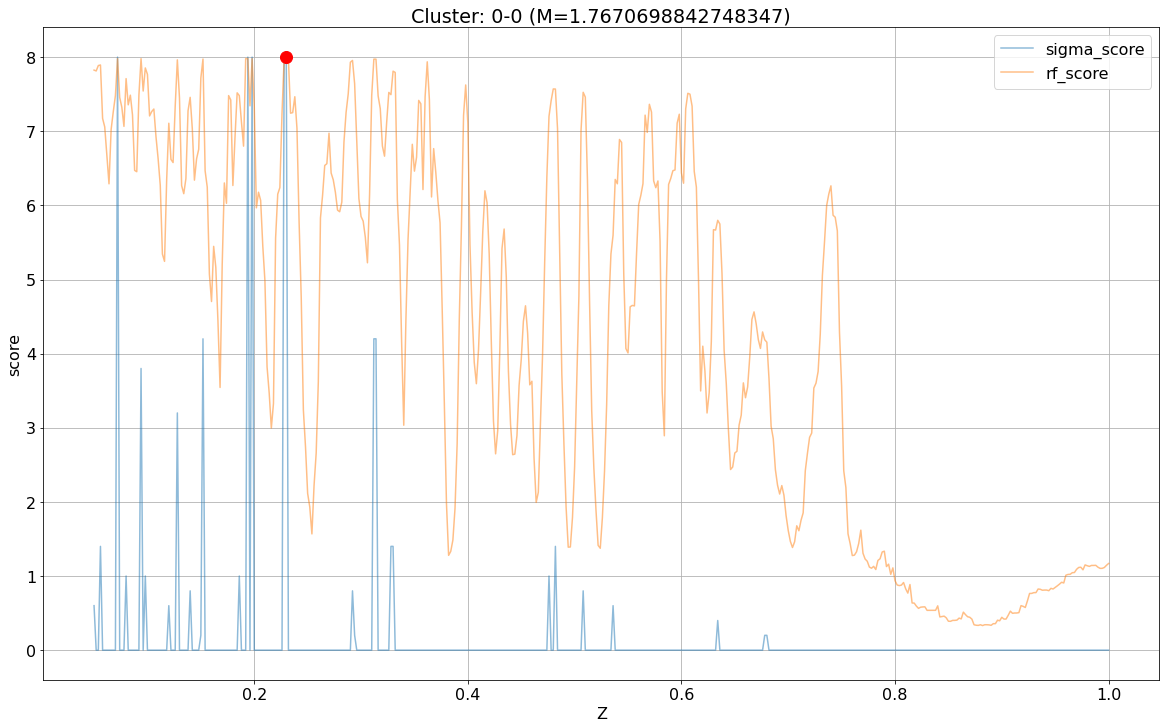

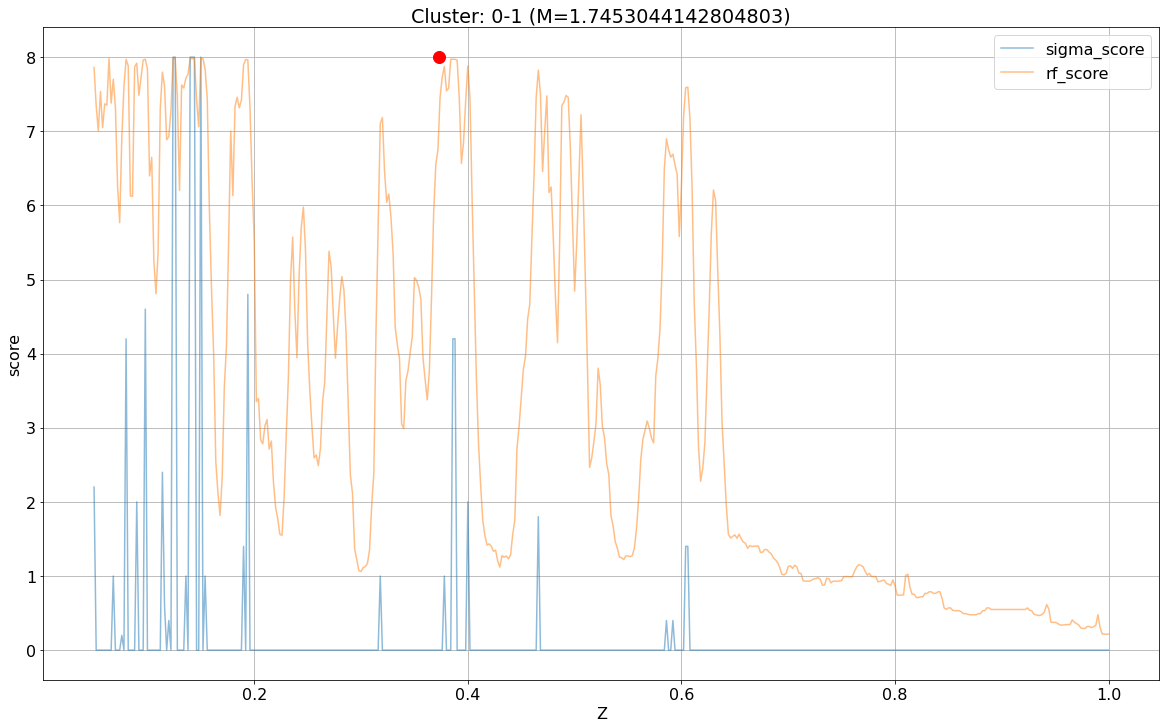

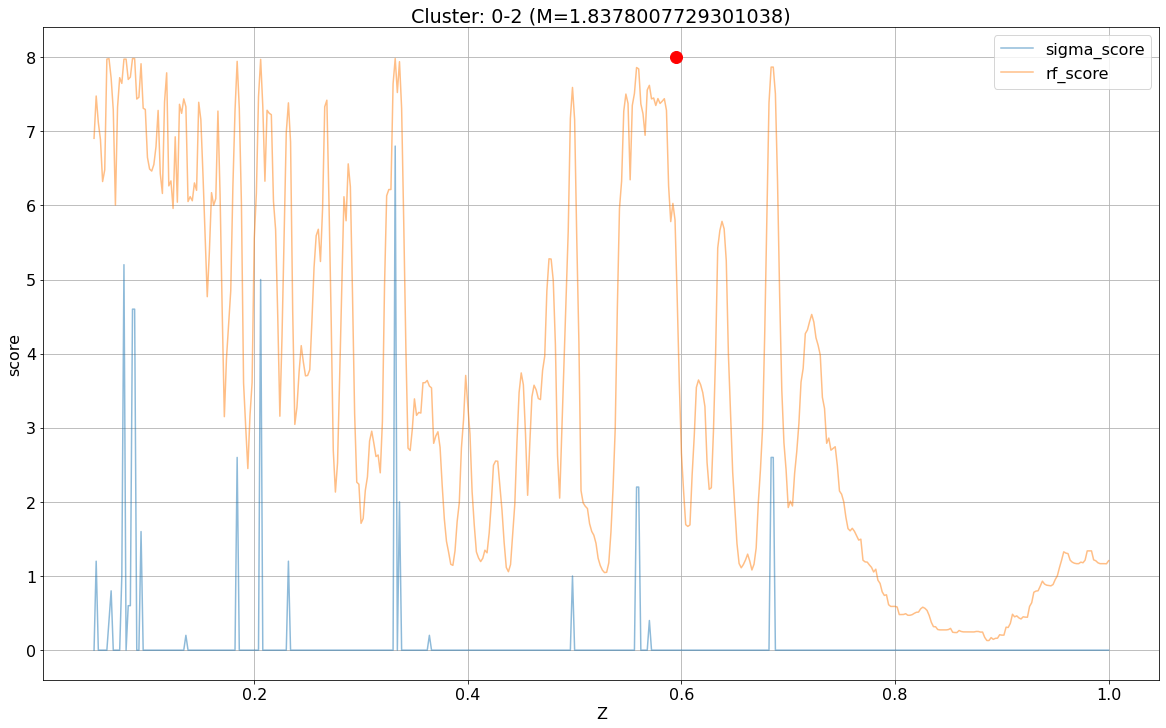

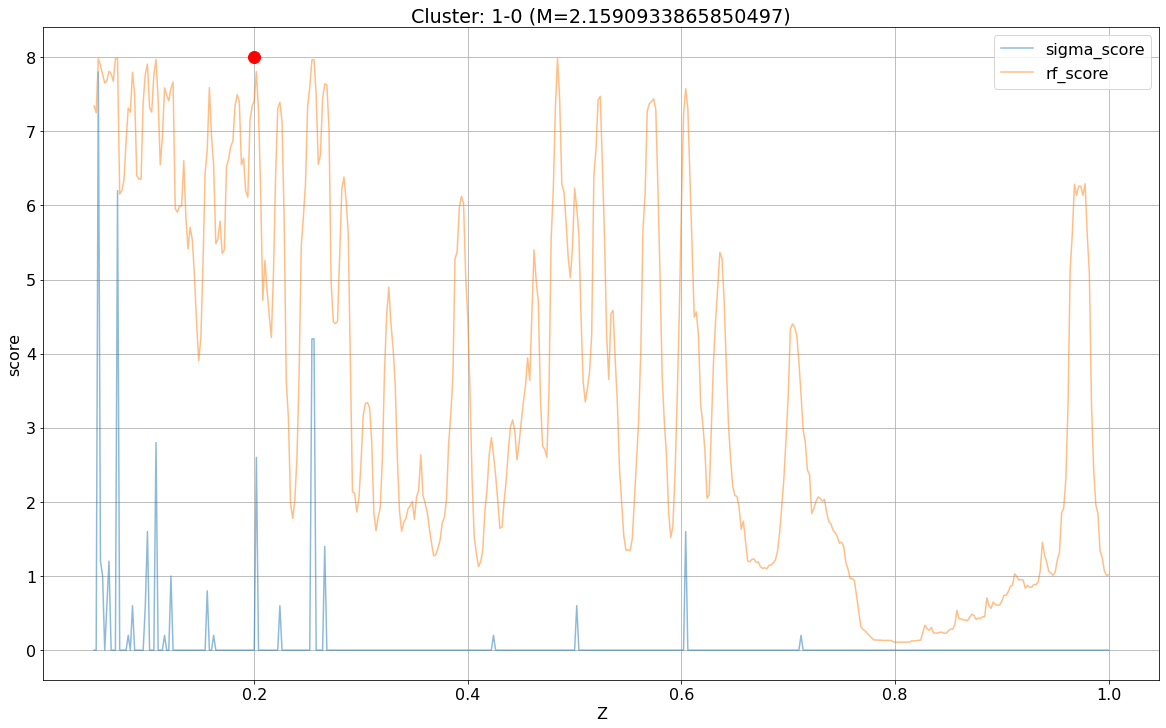

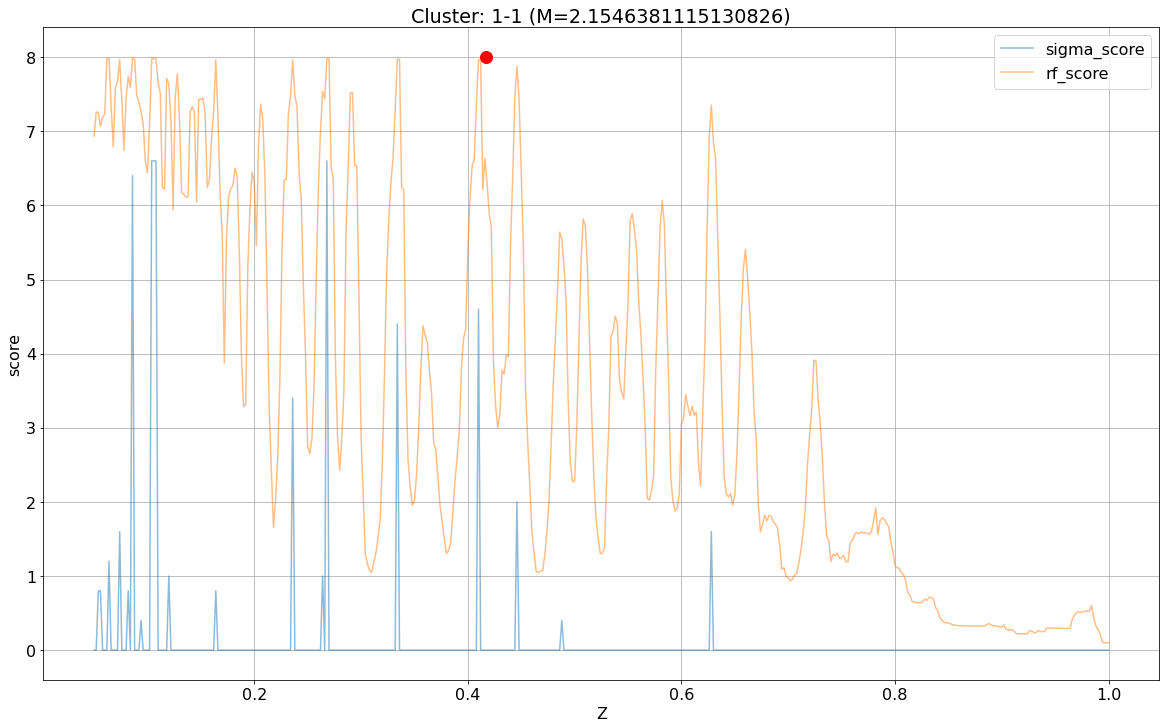

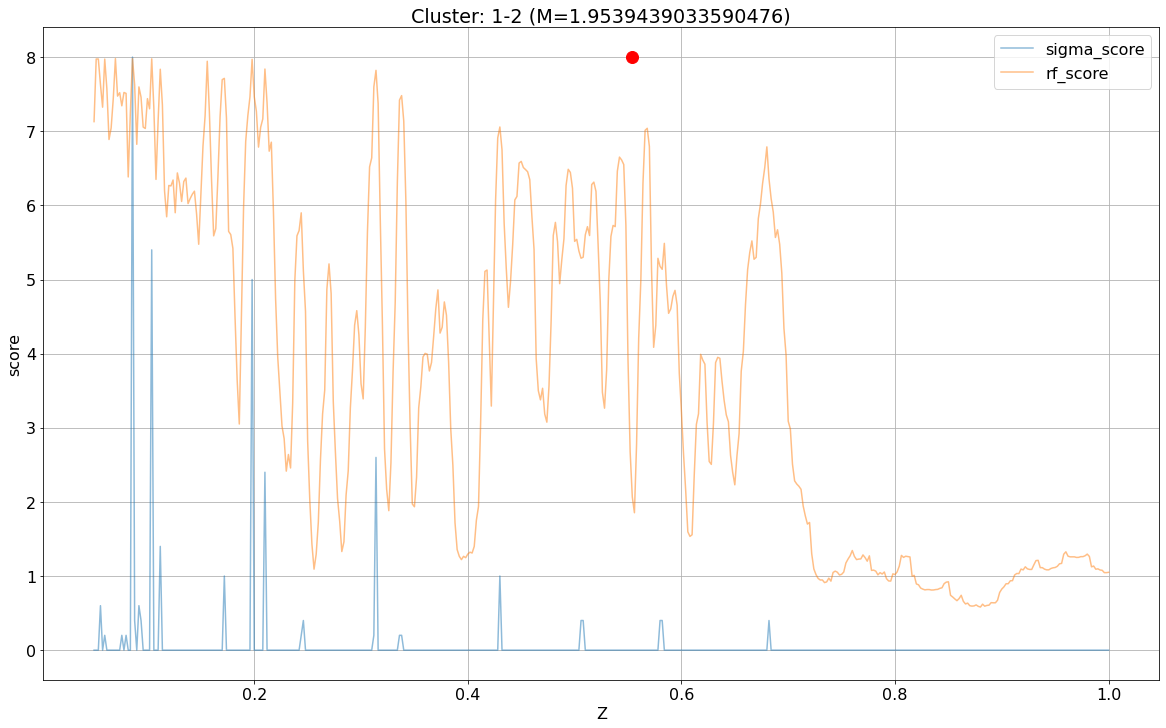

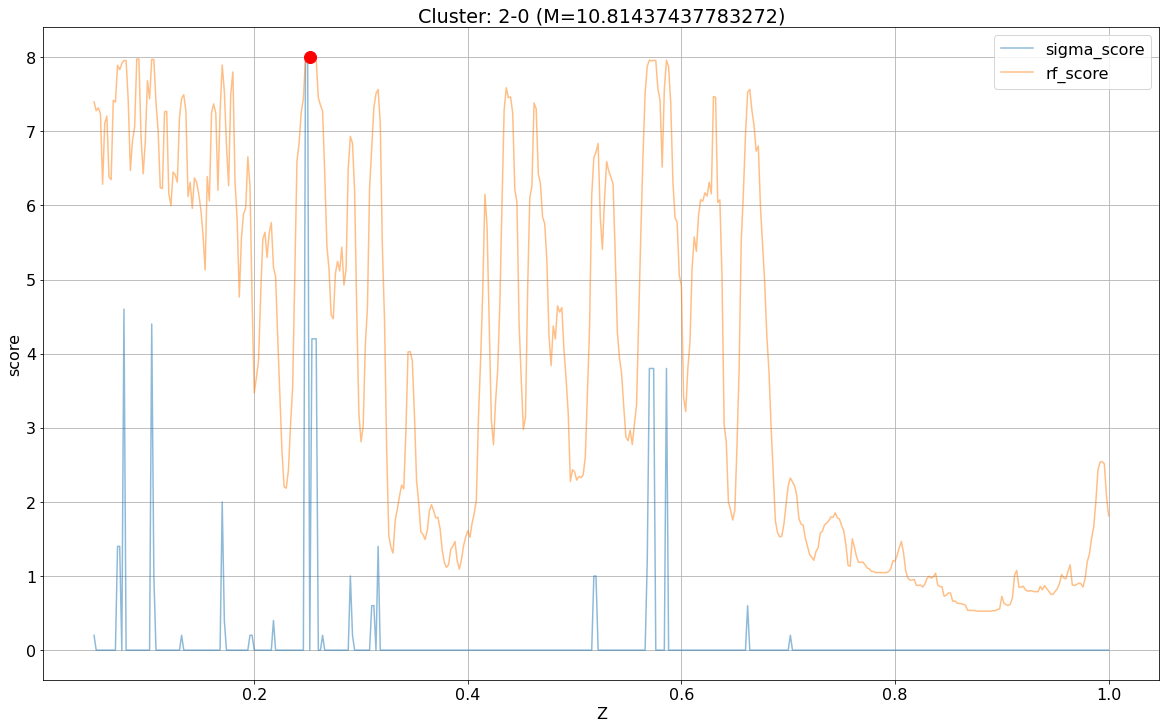

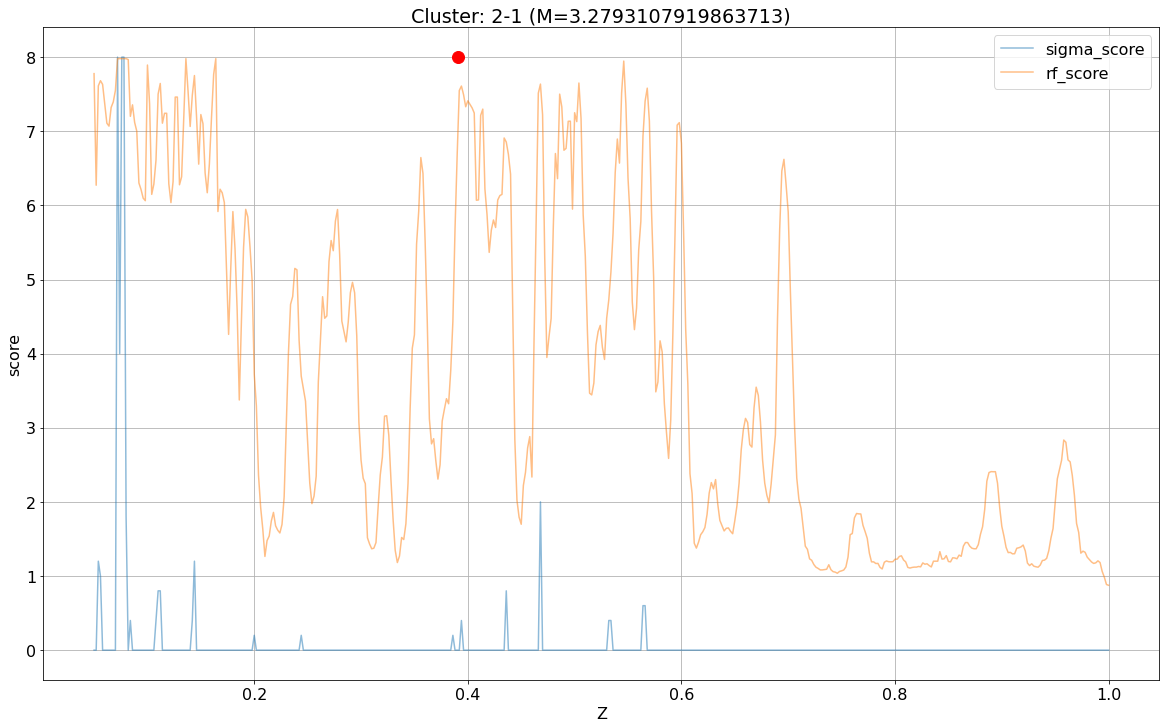

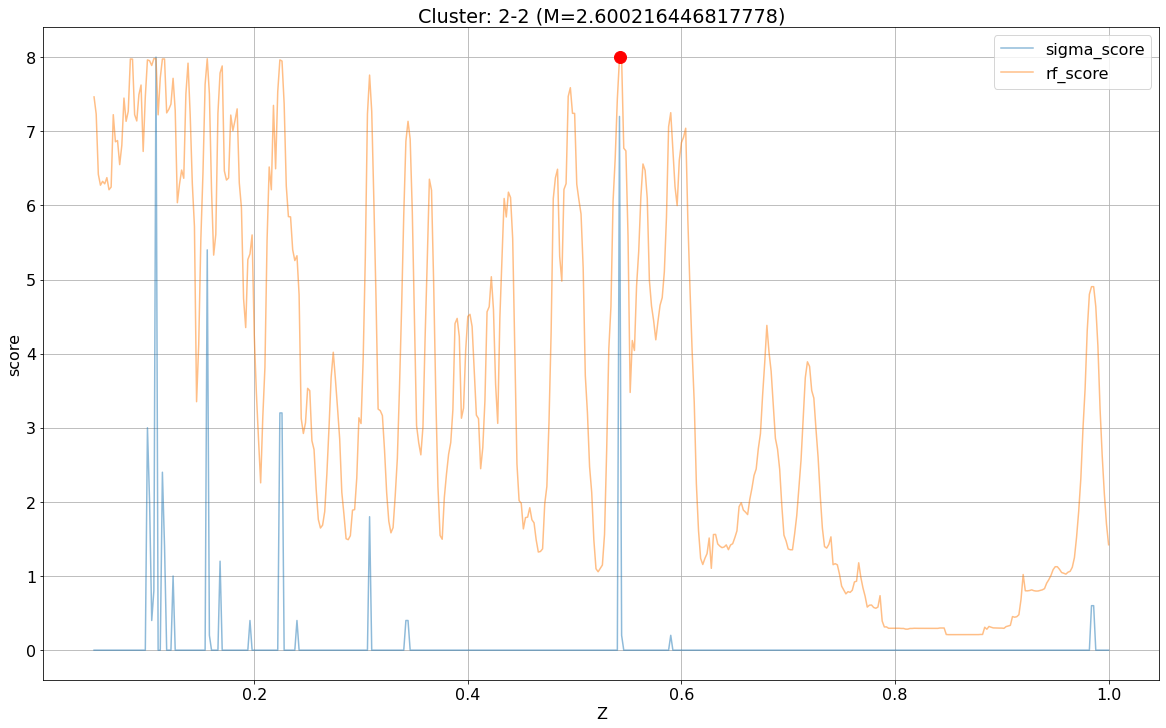

In [96]:
for i in range(3):
    for j in range(3):
        ID=idx[i][j]

        font = {'size': 16}
        plt.rc('font', **font)
        fig = plt.figure(figsize=(20, 12))
        plt.grid()

        plt.plot(
            cl_quas[cl_quas['ID'] == ID]['Z'][:],
            cl_quas[cl_quas['ID'] == ID]['sigma_4_score'][:],
            alpha=0.5,
            label='sigma_score'
        )
        plt.plot(
            cl_quas[cl_quas['ID'] == ID]['Z'][:],
            cl_quas[cl_quas['ID'] == ID]['RF_score'][:] * 8,
            alpha=0.5,
            label='rf_score'
        )
#         plt.vlines(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 0, 8, colors='r')
        plt.plot(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 8, 'ro', markersize=12)

        plt.xlabel('Z')
        plt.ylabel('score')
        plt.title(f'Cluster: {i}-{j} (M={clusters[clusters["ID"] == ID]["M"].iloc[0]})')
        plt.savefig(f'Cluster: {i}-{j} (M={clusters[clusters["ID"] == ID]["M"].iloc[0]}).jpg')
        plt.legend()

In [92]:
idx_q = [0, 0, 0]

In [93]:
Z_qs = np.quantile(full_quasars['Z'], [0.25, 0.5, 0.75])
Z_qs

array([0.56305, 0.72035, 0.834  ])

In [94]:
idx_q[0] = quasars[(quasars['Z'] < Z_qs[0])].sort_values(['Z']).iloc[-1]['ID']
idx_q[1] = quasars[(quasars['Z'] < Z_qs[1])].sort_values(['Z']).iloc[-1]['ID']
idx_q[2] = quasars[(quasars['Z'] > Z_qs[2])].sort_values(['Z']).iloc[0]['ID']

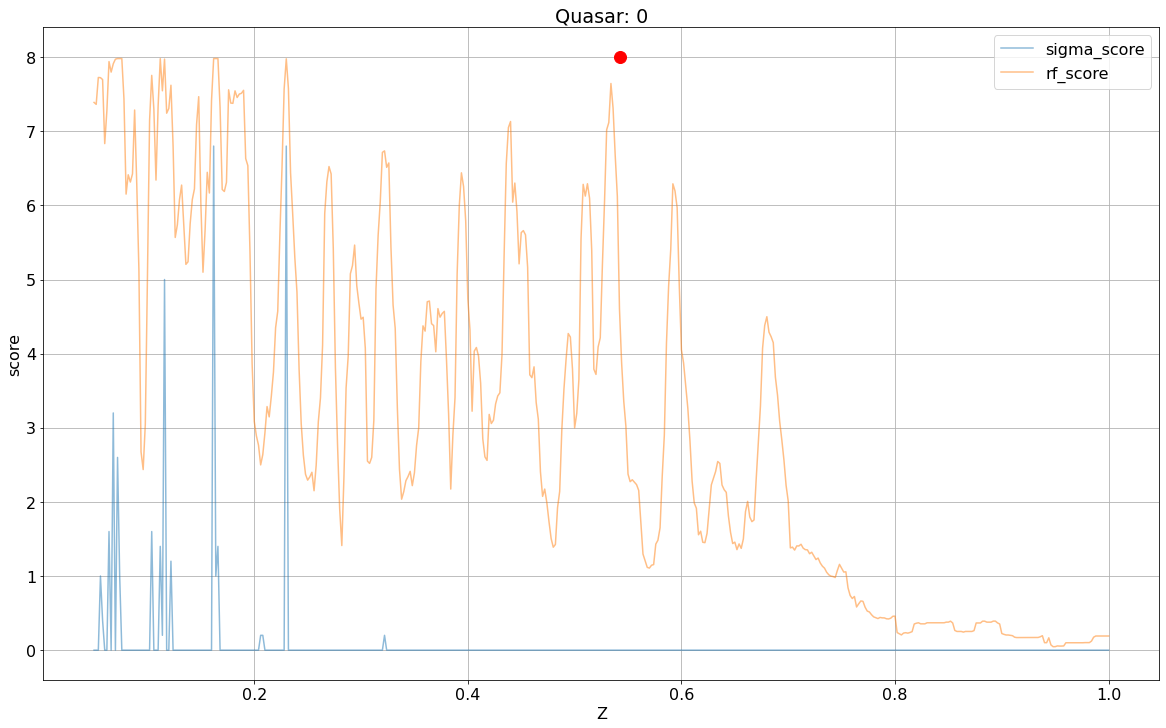

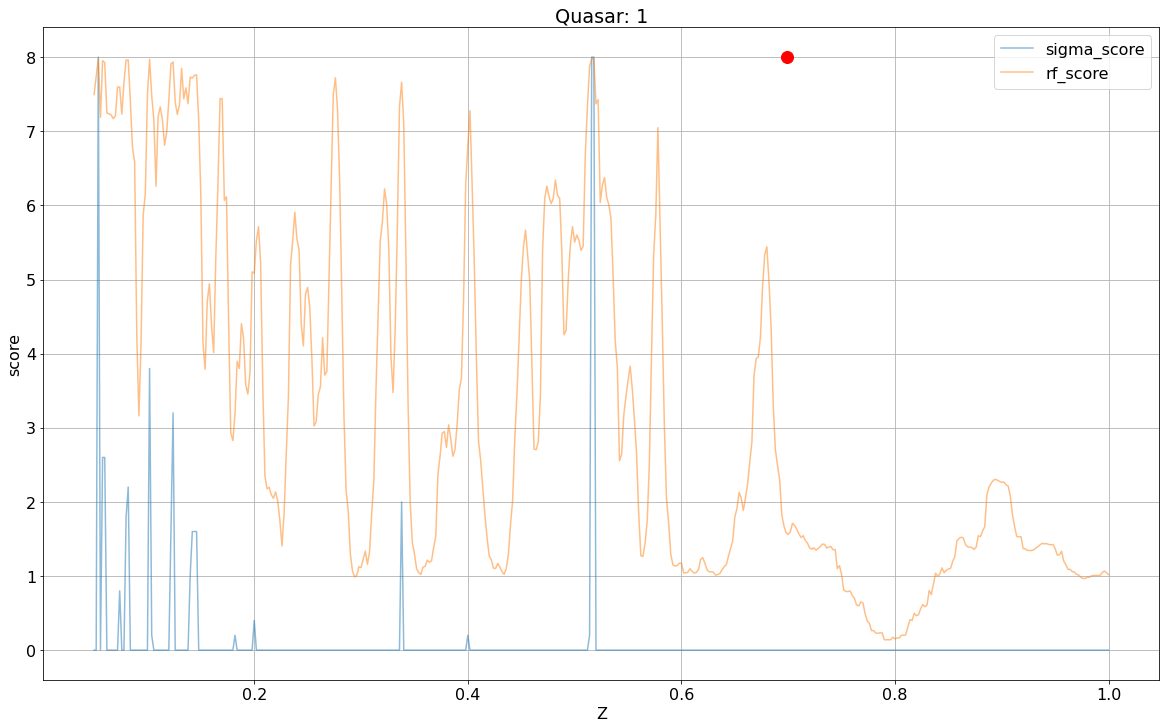

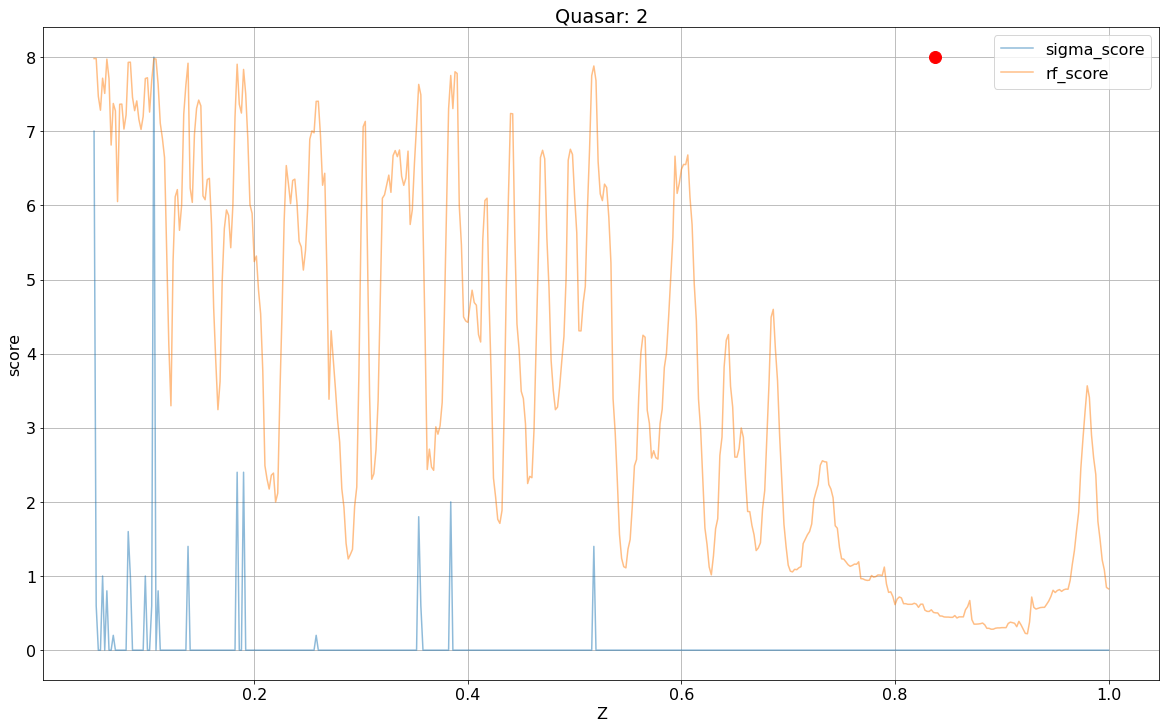

In [97]:
for i in range(3):
    ID=idx_q[i]

    font = {'size': 16}
    plt.rc('font', **font)
    fig = plt.figure(figsize=(20, 12))
    plt.grid()

    plt.plot(
        cl_quas[cl_quas['ID'] == ID]['Z'][:],
        cl_quas[cl_quas['ID'] == ID]['sigma_4_score'][:],
        alpha=0.5,
        label='sigma_score'
    )
    plt.plot(
        cl_quas[cl_quas['ID'] == ID]['Z'][:],
        cl_quas[cl_quas['ID'] == ID]['RF_score'][:] * 8,
        alpha=0.5,
        label='rf_score'
    )
#         plt.vlines(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 0, 8, colors='r')
    plt.plot(cl_quas[cl_quas['ID'] == ID]['Z_true'].iloc[0], 8, 'ro', markersize=12)

    plt.xlabel('Z')
    plt.ylabel('score')
    plt.title(f'Quasar: {i}')
    plt.legend()
    plt.savefig(f'Quasar: {i}.jpg')

In [110]:
full_quasars['Z'].max()

1.0